In [24]:
pip install tensorflow_decision_forests 

Note: you may need to restart the kernel to use updated packages.


In [25]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [26]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0


In [27]:
train_file_path = "../data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [28]:
dataset_df.head(3)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [29]:
dataset_df = dataset_df.drop('Id', axis=1)

In [30]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [31]:
print(dataset_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_213/1574274173.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);
/tmp/ipykernel_213/1574274173.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, his

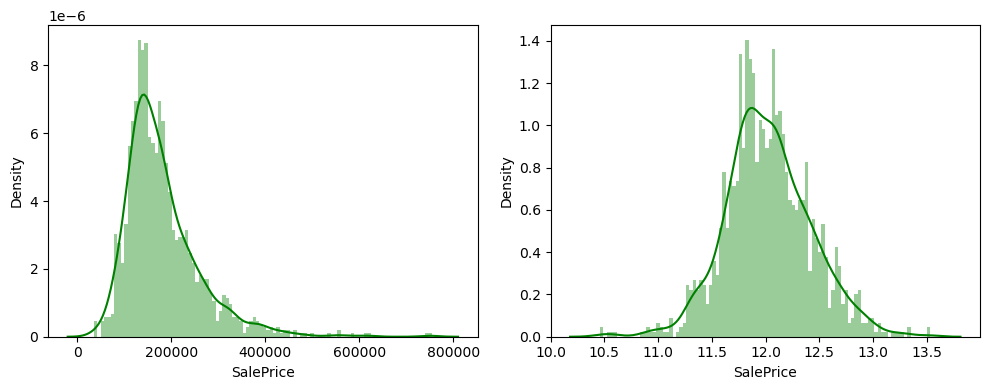

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);

dataset_df['SalePrice']= dataset_df['SalePrice'].apply(lambda x: np.log(x))

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[1])

plt.tight_layout()
plt.show()



### Change the type of the variable to the right one:

In [33]:
dataset_df['MSSubClass'] = dataset_df['MSSubClass'].astype(str)
dataset_df['OverallQual'] = dataset_df['OverallQual'].astype(int)
dataset_df['OverallCond'] = dataset_df['OverallCond'].astype(int)
# dataset_df['YearBuilt'] = dataset_df['YearBuilt'].astype(str)
# dataset_df['YearRemodAdd'] = dataset_df['YearRemodAdd'].astype(str)
# dataset_df['BsmtFullBath'] = dataset_df['BsmtFullBath'].astype(str)
# dataset_df['BsmtHalfBath'] = dataset_df['BsmtHalfBath'].astype(str)
# dataset_df['FullBath'] = dataset_df['FullBath'].astype(str)
# dataset_df['HalfBath'] = dataset_df['HalfBath'].astype(str)
dataset_df['BedroomAbvGr'] = dataset_df['BedroomAbvGr'].astype(int)
dataset_df['KitchenAbvGr'] = dataset_df['KitchenAbvGr'].astype(int)
dataset_df['TotRmsAbvGrd'] = dataset_df['TotRmsAbvGrd'].astype(int)
dataset_df['Fireplaces'] = dataset_df['Fireplaces'].astype(int)
# dataset_df['GarageYrBlt'] = dataset_df['GarageYrBlt'].astype(str)
dataset_df['GarageCars'] = dataset_df['GarageCars'].astype(str)
# dataset_df['MoSold'] = dataset_df['MoSold'].astype(str)
# dataset_df['YrSold'] = dataset_df['YrSold'].astype(str)

In [34]:
list(set(dataset_df.dtypes.tolist()))


[dtype('float64'), dtype('int64'), dtype('O')]

### Create the data set of only numerical columns:

In [35]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0       196.0         706           0        150  ...           0   
1         0.0         978           0        284  ...         298   
2       162.0         486           0        434  ...           0   
3         0.0         216           0        540  ...           0   
4       350.0         655           0        490  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216  

[5 rows x 35 columns]

### Check how many NaN in the numerical columns:

In [36]:
df_num.isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Check the correlation between each variable VS SalePrice:

<Axes: >

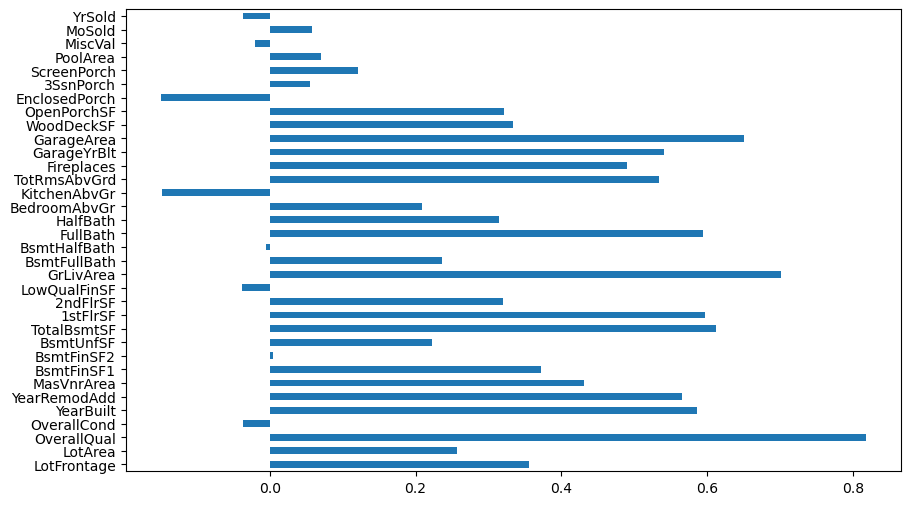

In [37]:
correlation_values = df_num.corr()["SalePrice"].drop("SalePrice")
correlation_values.plot(kind='barh', figsize=(10, 6))

### View the distribution of each numerical variable:

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'Kitc

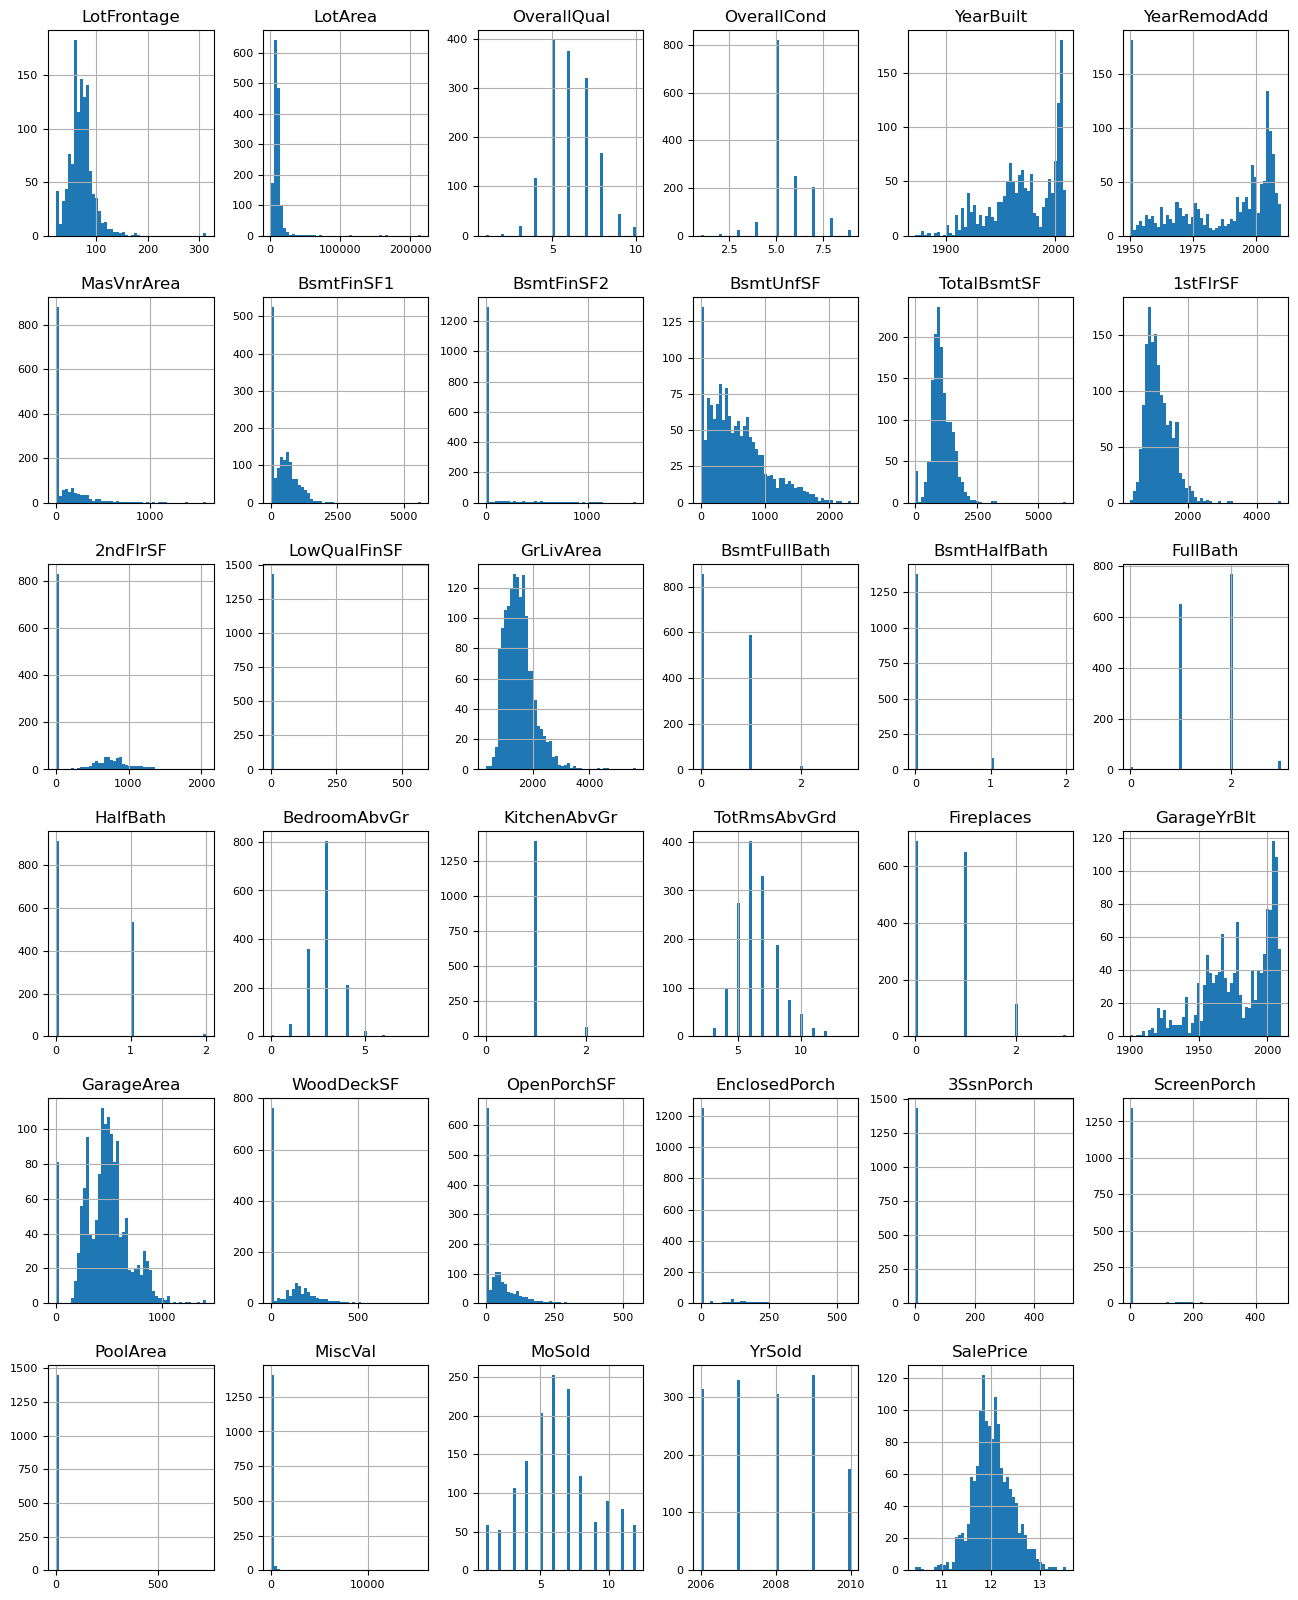

In [38]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


### Check how many NaN values in the complete dataset:

In [39]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())
print(dataset_df.isnull().sum()[dataset_df.isnull().sum() > 0])

NaN values remaining: 7829
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [40]:
dataset_df.sample(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
725          20       RL         60.0     6960   Pave   NaN      Reg   
932          20       RL         84.0    11670   Pave   NaN      IR1   
28           20       RL         47.0    16321   Pave   NaN      IR1   
1364        160       FV         30.0     3180   Pave  Pave      Reg   
681          50       RH         55.0     4500   Pave  Pave      IR2   
205          20       RL         99.0    11851   Pave   NaN      Reg   
468          20       RL         98.0    11428   Pave   NaN      IR1   
1169         60       RL        118.0    35760   Pave   NaN      IR1   
1353         50       RL         56.0    14720   Pave   NaN      IR1   
540          20       RL         85.0    14601   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
725          Lvl    AllPub    Inside  ...        0    NaN   NaN        Shed   
932          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
28           Lvl    AllPub   CulDSac  ...        0    NaN   NaN         NaN   
1364         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
681          Bnk    AllPub    Inside  ...        0    NaN   NaN         NaN   
205          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
468          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1169         Lvl    AllPub   CulDSac  ...        0    NaN   NaN         NaN   
1353         Lvl    AllPub   CulDSac  ...        0    NaN   NaN         NaN   
540          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
725      500     11    2009        WD         Normal  11.699405  
932        0      3    2007        WD         Normal  12.676076  
28         0     12    2006        WD         Normal  12.242887  
1364       0      4    2006        WD        Abnorml  11.878624  
681        0      7    2009        WD        Abnorml  11.979385  
205        0      5    2009        WD         Normal  12.103486  
468        0      5    2007        WD         Normal  12.429216  
1169       0      7    2006        WD         Normal  13.345507  
1353       0      3    2010        WD         Normal  12.923912  
540        0      3    2009        WD         Normal  12.660328  

[10 rows x 80 columns]

### Create new better columns GarageAgeAtSale and HouseAgeAtSale and remove old one:

In [41]:
dataset_df["HouseAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["YearBuilt"].astype(float)
dataset_df["GarageAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["GarageYrBlt"].astype(float)
dataset_df = dataset_df.drop(columns=["YrSold"], errors="ignore")

### Create new better columns BsmtBath and Bath and remove old ones:

In [42]:
dataset_df["BsmtBath"] = dataset_df["BsmtFullBath"].astype(float) + 0.5 * dataset_df["BsmtHalfBath"].astype(float)
dataset_df["Bath"] = dataset_df["FullBath"].astype(float) + 0.5 * dataset_df["HalfBath"].astype(float)
dataset_df = dataset_df.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

### Change columns categorical into ordinal:

In [43]:
quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_213/1291931383.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)


In [44]:
finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}


# Remplacer les valeurs
dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
dataset_df["GarageCond"] = dataset_df["GarageCond"].replace(quality_mapping)

# dataset_df = dataset_df.drop(columns=["GarageQual"], errors="ignore")

/tmp/ipykernel_213/3448772247.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_213/3448772247.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
/tmp/ipykernel_213/3448772247.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fals

In [45]:
exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
dataset_df["BsmtExposure"] = dataset_df["BsmtExposure"].replace(exposure_mapping)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_213/3286904787.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
/tmp/ipykernel_213/3286904787.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
/tmp/ipykernel_213/3286904787.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt

### Remove not important columns (related to inspector.variable_importances):

In [46]:
dataset_df = dataset_df.drop(
    columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
    errors="ignore")

In [47]:
dataset_df = dataset_df.drop(
    columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
             'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
    errors="ignore")

In [48]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   object 
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1201 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   Utilities        1460 non-null   object 
 6   Neighborhood     1460 non-null   object 
 7   OverallQual      1460 non-null   int64  
 8   OverallCond      1460 non-null   int64  
 9   YearBuilt        1460 non-null   int64  
 10  YearRemodAdd     1460 non-null   int64  
 11  Exterior1st      1460 non-null   object 
 12  Exterior2nd      1460 non-null   object 
 13  MasVnrArea       1452 non-null   float64
 14  ExterQual        1460 non-null   object 
 15  BsmtQual         1423 non-null   float64
 16  BsmtCond         1423 non-null   float64
 17  BsmtExposure  

In [49]:
dataset_df.sample(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Utilities Neighborhood  \
1193        120       RM          NaN     4500   Pave    AllPub      Mitchel   
304          75       RM         87.0    18386   Pave    AllPub      OldTown   
1342         60       RL          NaN     9375   Pave    AllPub      CollgCr   
13           20       RL         91.0    10652   Pave    AllPub      CollgCr   
1134         60       RL         57.0     8773   Pave    AllPub      Gilbert   
716          70       RM         60.0    10800   Pave    AllPub      OldTown   
631         120       RL         34.0     4590   Pave    AllPub      NridgHt   
1273         80       RL        124.0    11512   Pave    AllPub      Edwards   
720         120       RL          NaN     6563   Pave    AllPub      StoneBr   
717          20       RL         80.0    10000   Pave    AllPub       NWAmes   

      OverallQual  OverallCond  YearBuilt  ...  PoolArea PoolQC MiscFeature  \
1193            6            5       1999  ...         0    NaN         NaN   
304             7            9       1880  ...         0    NaN         NaN   
1342            8            5       2002  ...         0    NaN         NaN   
13              7            5       2006  ...         0    NaN         NaN   
1134            6            5       1997  ...         0    NaN         NaN   
716             7            8       1890  ...         0    NaN         NaN   
631             8            5       2006  ...         0    NaN         NaN   
1273            6            7       1959  ...         0    NaN         NaN   
720             8            5       1985  ...         0    NaN         NaN   
717             5            6       1973  ...         0    NaN         NaN   

      MiscVal MoSold  SalePrice  HouseAgeAtSale  GarageAgeAtSale BsmtBath  \
1193        0      6  12.013701            10.0             10.0      1.0   
304         0      5  12.594731           128.0              5.0      0.0   
1342        0      8  12.339291             5.0              5.0      0.0   
13          0      8  12.540758             1.0              1.0      0.0   
1134        0      8  12.037654            10.0             10.0      0.0   
716         0      7  11.979799           117.0             11.0      0.0   
631         0      8  12.252479             1.0              1.0      0.0   
1273        0      5  12.083905            49.0             49.0      1.0   
720         0     12  12.524526            21.0             21.0      1.0   
717         0     11  11.964001            35.0             35.0      0.5   

      Bath  
1193   2.0  
304    3.0  
1342   2.5  
13     2.0  
1134   2.5  
716    1.5  
631    2.0  
1273   1.0  
720    2.0  
717    1.5  

[10 rows x 54 columns]

In [50]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 3680


### In categorical columns, put all rare categories into one unique category "Other":

In [51]:
threshold = dataset_df.shape[0] * 0.02  # nombre minimum d'occurrences pour ne pas être rare

# Boucle sur toutes les colonnes de type object (catégorielles)
for col in dataset_df.select_dtypes(include=['object']).columns:
    counts = dataset_df[col].value_counts()
    rare_cats = counts[counts < threshold].index
    dataset_df[col] = dataset_df[col].replace(rare_cats, "Other")


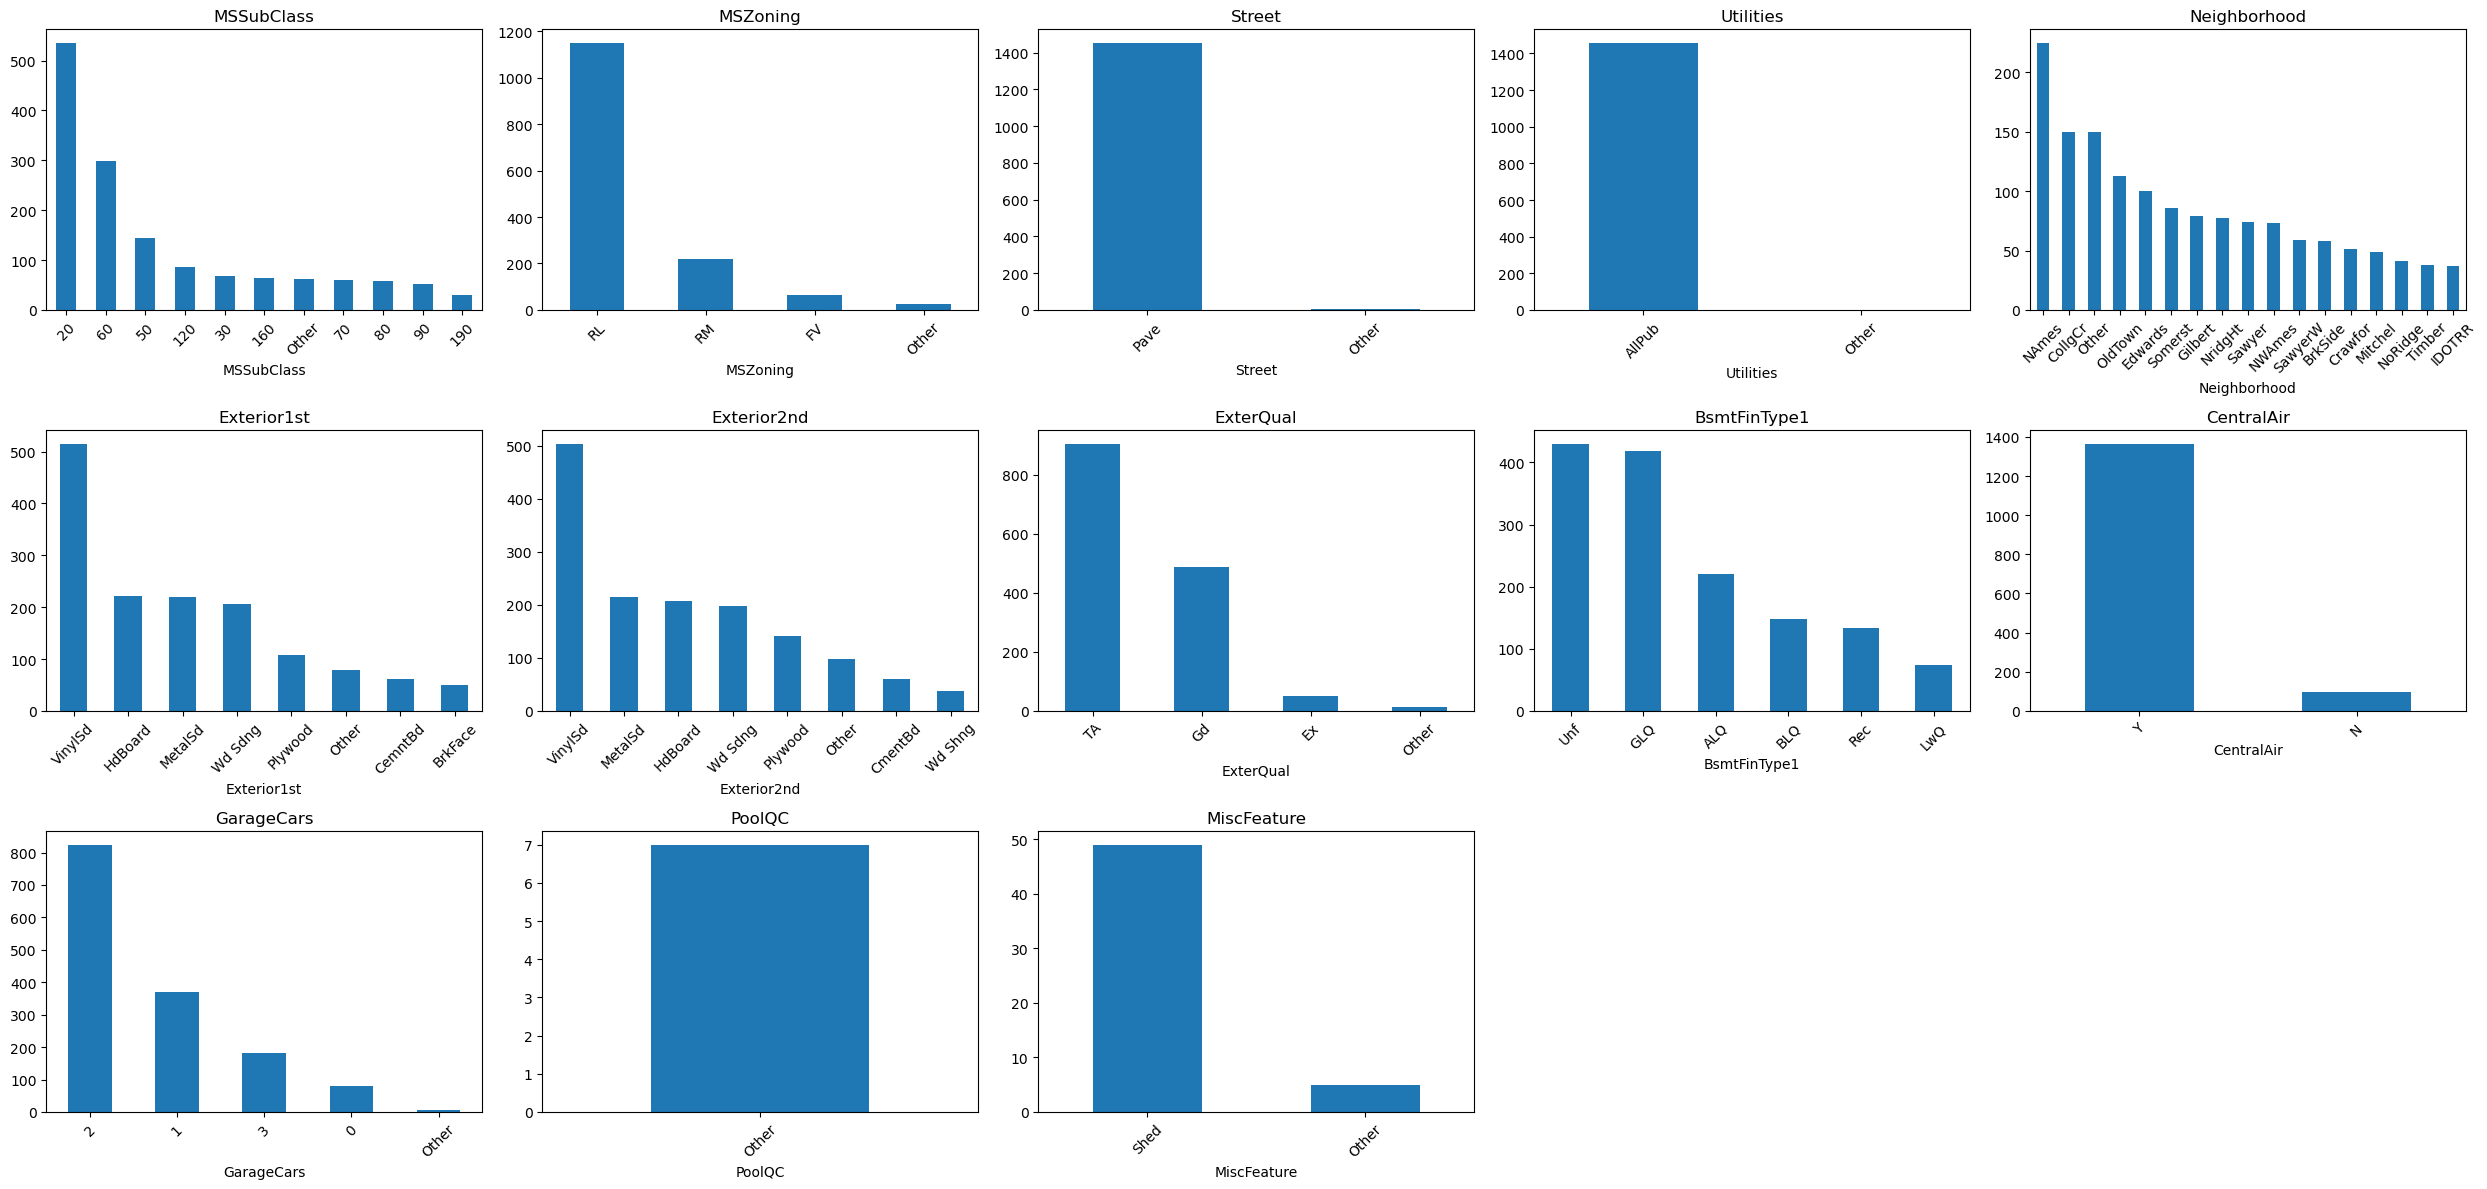

In [52]:
# dataset_df.select_dtypes(include = ['O']).plot.box(figsize=(16, 20));
cat_cols = dataset_df.select_dtypes(include=['object']).columns

# Déterminer la taille de la figure
n_cols = 5  # nombre de colonnes de subplots
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

for i, col in enumerate(cat_cols):
    dataset_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si cat_cols n'est pas multiple de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


2025-09-03 15:44:46.953772: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp6i795rm0 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.811350. Found 1168 examples.
Training model...


I0000 00:00:1756914290.165625     213 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756914290.166185     213 kernel.cc:783] Collect training examples
I0000 00:00:1756914290.166268     213 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756914290.168610     213 kernel.cc:401] Number of batches: 2
I0000 00:00:1756914290.168750     213 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756914290.170284     213 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column GarageCars (4 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756914290.170397     213 data_spec_inference.cc:354] 1 item(s) have been pr

Model trained in 0:00:03.893307
Compiling model...


I0000 00:00:1756914293.997568     213 decision_forest.cc:808] Model loaded with 300 root(s), 111202 node(s), and 49 input feature(s).
I0000 00:00:1756914294.001220     213 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-09-03 15:44:54.001385: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 84ms/step
Fold 1 RMSE: 30540.64
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp51ro0q3w as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.430537. Found 1168 examples.
Training model...


I0000 00:00:1756914295.628817     213 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756914295.628874     213 kernel.cc:783] Collect training examples
I0000 00:00:1756914295.628890     213 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756914295.629068     213 kernel.cc:401] Number of batches: 2
I0000 00:00:1756914295.629077     213 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756914295.629811     213 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column GarageCars (4 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756914295.629861     213 data_spec_inference.cc:354] 1 item(s) have been pr

Model trained in 0:00:04.147916
Compiling model...
Model compiled.
1/1 [==============================] - 0s 100ms/step
Fold 2 RMSE: 28756.06
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpq_1gt6ht as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.453891. Found 1168 examples.
Training model...


I0000 00:00:1756914300.790137     213 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756914300.790217     213 kernel.cc:783] Collect training examples
I0000 00:00:1756914300.790250     213 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756914300.790382     213 kernel.cc:401] Number of batches: 2
I0000 00:00:1756914300.790389     213 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756914300.791120     213 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column MiscFeature (1 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756914300.791577     213 kernel.cc:802] Training dataset:
Number of record

Model trained in 0:00:04.412969
Compiling model...


I0000 00:00:1756914305.177615     213 decision_forest.cc:808] Model loaded with 300 root(s), 111246 node(s), and 50 input feature(s).
I0000 00:00:1756914305.177692     213 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-09-03 15:45:05.177717: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


1/1 [==============================] - 0s 93ms/step
Fold 3 RMSE: 38461.74
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp87izfnjt as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.401939. Found 1168 examples.
Training model...


I0000 00:00:1756914306.184793     213 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756914306.184859     213 kernel.cc:783] Collect training examples
I0000 00:00:1756914306.184900     213 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756914306.185073     213 kernel.cc:401] Number of batches: 2
I0000 00:00:1756914306.185083     213 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756914306.185827     213 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Utilities (1 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756914306.186280     213 kernel.cc:802] Training dataset:
Number of records:

Model trained in 0:00:05.283407
Compiling model...


I0000 00:00:1756914311.439764     213 decision_forest.cc:808] Model loaded with 300 root(s), 111322 node(s), and 50 input feature(s).
2025-09-03 15:45:11.439866: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 111ms/step
Fold 4 RMSE: 30433.64
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpf4_f2mms as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.588281. Found 1168 examples.
Training model...


I0000 00:00:1756914312.758099     213 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756914312.758192     213 kernel.cc:783] Collect training examples
I0000 00:00:1756914312.758216     213 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756914312.758452     213 kernel.cc:401] Number of batches: 2
I0000 00:00:1756914312.758464     213 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756914312.759414     213 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column GarageCars (4 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756914312.759498     213 data_spec_inference.cc:354] 1 item(s) have been pr

Model trained in 0:00:05.458062
Compiling model...


I0000 00:00:1756914318.186006     213 decision_forest.cc:808] Model loaded with 300 root(s), 110934 node(s), and 50 input feature(s).
I0000 00:00:1756914318.186114     213 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-09-03 15:45:18.186156: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


1/1 [==============================] - 0s 102ms/step
Fold 5 RMSE: 22232.03


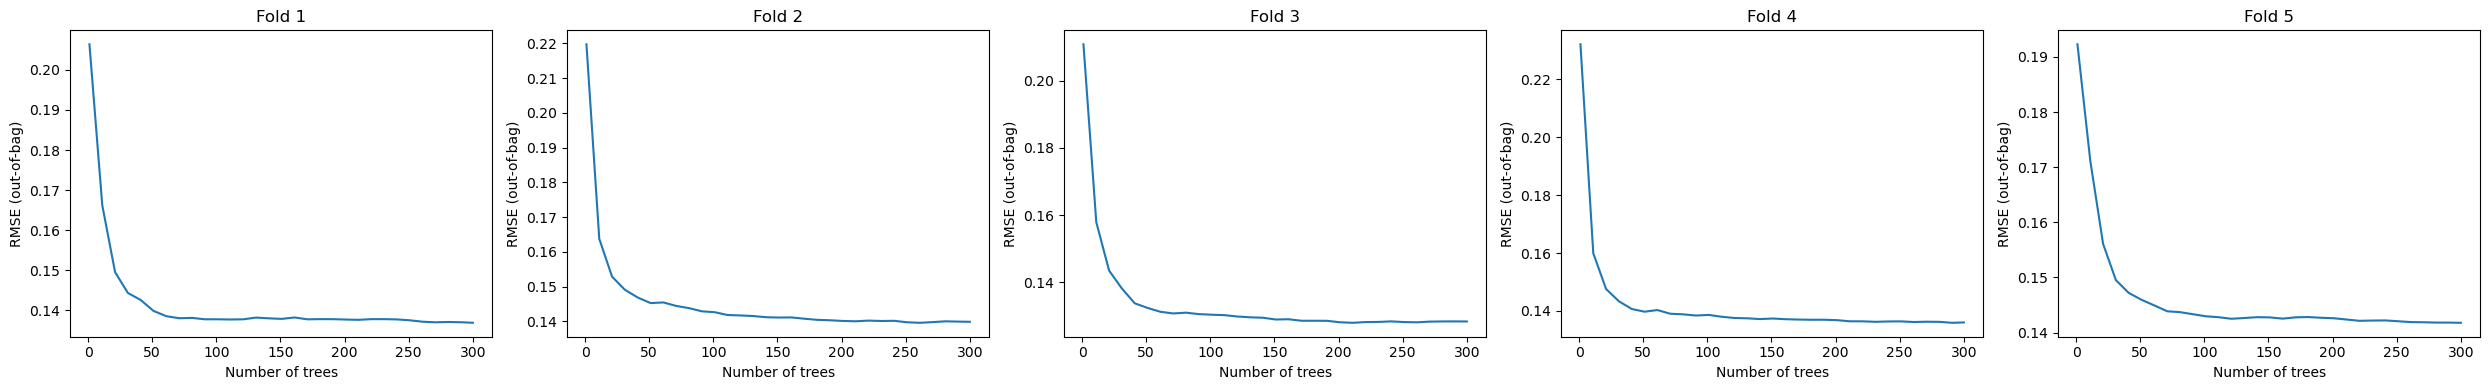

RMSE moyen sur les 5 folds : 30084.82197672277


In [53]:
from sklearn.metrics import mean_squared_error

dataset_df_rand = dataset_df.sample(frac=1, random_state=42).reset_index(drop=True)
n_splits = 5
rmse_scores = []
label = 'SalePrice'

# Préparer les subplots (1 ligne, n_splits colonnes)
fig, axes = plt.subplots(1, n_splits, figsize=(5 * n_splits, 4))

fold_size = len(dataset_df_rand) // n_splits

for i in range(n_splits):
    # Définir indices du fold
    test_start = i * fold_size
    test_end = (i + 1) * fold_size if i != n_splits - 1 else len(dataset_df_rand)

    df_test = dataset_df_rand.iloc[test_start:test_end]
    df_train = pd.concat([dataset_df_rand.iloc[:test_start], dataset_df_rand.iloc[test_end:]])

    # Convertir en tf.data.Dataset
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label=label, task=tfdf.keras.Task.REGRESSION)
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_test, label=label, task=tfdf.keras.Task.REGRESSION)

    # Créer et entraîner le modèle
    model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION, random_seed=42)
    model.fit(train_ds)

    inspector = model.make_inspector()
    # rmse = inspector.evaluation().rmse
    test_pred_log = model.predict(test_ds)
    test_pred_real = np.exp(test_pred_log)
    test_val_real = np.exp(df_test['SalePrice'])   
    rmse_real = np.sqrt(mean_squared_error(test_val_real, test_pred_real))
    rmse_scores.append(rmse_real)
    print(f"Fold {i+1} RMSE: {rmse_real:.2f}")

    # Extraire les logs et tracer dans un subplot
    logs = model.make_inspector().training_logs()
    axes[i].plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
    axes[i].set_title(f"Fold {i+1}")
    axes[i].set_xlabel("Number of trees")
    axes[i].set_ylabel("RMSE (out-of-bag)")

plt.tight_layout()
plt.show()

print("RMSE moyen sur les 5 folds :", np.mean(rmse_scores))

In [54]:
# label = 'SalePrice'
# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
# valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [55]:
# tfdf.keras.get_all_models()

In [56]:
# rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
# rf.compile(metrics=["mse"])

In [57]:
# rf.fit(x=train_ds)

In [58]:
# from IPython.display import HTML, display
# import tensorflow_decision_forests as tfdf

# # rf is your trained model
# html = tfdf.model_plotter.plot_model(rf, tree_idx=0, max_depth=4)
# display(HTML(html))

In [59]:
# import matplotlib.pyplot as plt
# logs = rf.make_inspector().training_logs()
# plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
# plt.xlabel("Number of trees")
# plt.ylabel("RMSE (out-of-bag)")
# plt.show()

In [60]:
# inspector = rf.make_inspector()
# inspector.evaluation()

In [61]:
# inspector.features()

In [62]:
# evaluation = rf.evaluate(x=valid_ds,return_dict=True)

# for name, value in evaluation.items():
#   print(f"{name}: {value:.4f}")

In [63]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [64]:
print(inspector.variable_importances()["NUM_AS_ROOT"])


[("OverallQual" (1; #42), 157.0), ("Bath" (1; #3), 47.0), ("GrLivArea" (1; #26), 42.0), ("KitchenQual" (1; #29), 28.0), ("TotalBsmtSF" (1; #48), 27.0), ("HouseAgeAtSale" (1; #27), 25.0), ("YearBuilt" (1; #51), 25.0), ("ExterQual" (4; #15), 21.0), ("BsmtQual" (1; #11), 20.0), ("GarageArea" (1; #20), 18.0), ("MiscVal" (1; #37), 16.0), ("GarageYrBlt" (1; #25), 15.0), ("1stFlrSF" (1; #0), 14.0), ("LotArea" (1; #30), 14.0), ("Fireplaces" (1; #18), 12.0), ("OpenPorchSF" (1; #40), 12.0), ("3SsnPorch" (1; #2), 10.0), ("TotRmsAbvGrd" (1; #47), 10.0), ("BsmtCond" (1; #6), 9.0), ("BsmtFinSF1" (1; #8), 9.0), ("LowQualFinSF" (1; #32), 9.0), ("PoolArea" (1; #43), 9.0), ("KitchenAbvGr" (1; #28), 8.0), ("EnclosedPorch" (1; #14), 7.0), ("GarageAgeAtSale" (1; #19), 7.0), ("GarageFinish" (1; #23), 7.0), ("YearRemodAdd" (1; #52), 7.0), ("GarageCond" (1; #22), 6.0), ("GarageQual" (1; #24), 6.0), ("LotFrontage" (1; #31), 6.0), ("BedroomAbvGr" (1; #4), 5.0), ("BsmtFinSF2" (1; #9), 4.0), ("2ndFlrSF" (1; #1), 

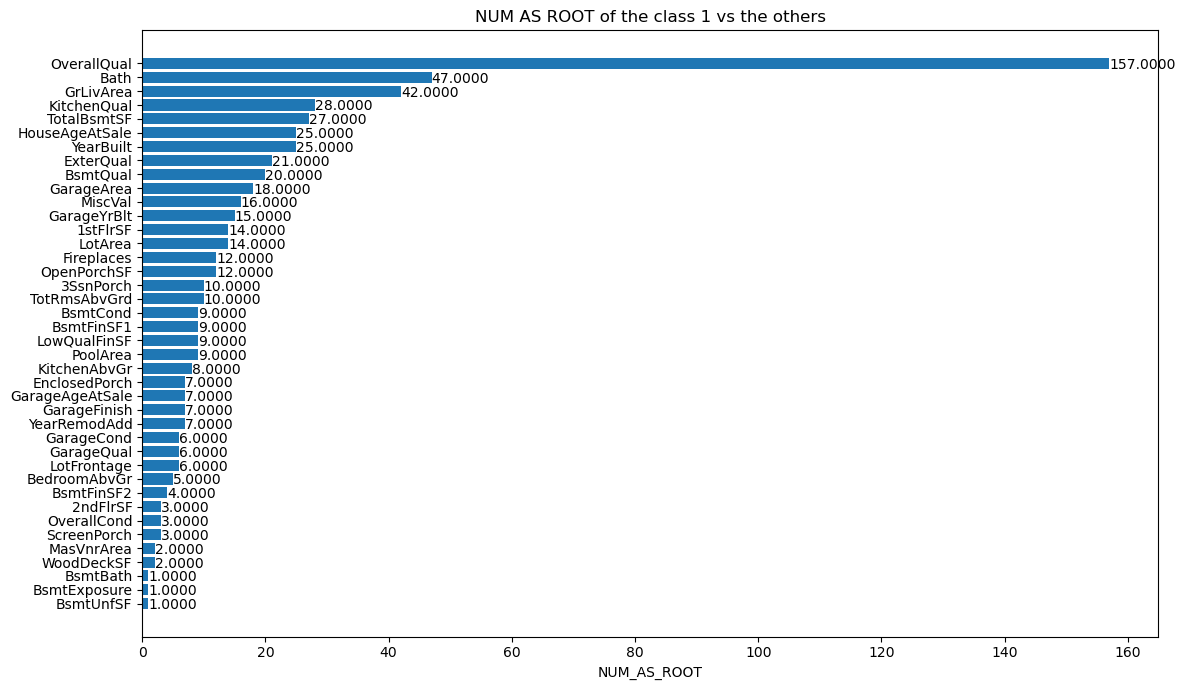

In [65]:
plt.figure(figsize=(12, 7))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [66]:
# Extraire toutes les importances
importances = inspector.variable_importances()

# On va récupérer seulement les 3 types qui nous intéressent
keys = ["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]

# Construire un DataFrame
dfs = []
for key in keys:
    data = []
    # importances[key] est une liste de tuples (feature, importance)
    for feat, imp in importances.get(key, []):
        if isinstance(feat, str):
            data.append((feat, imp))
        else:
            data.append((feat.name, imp))  # Sinon, on extrait son .name
    df = pd.DataFrame(data, columns=["Feature", key])
    dfs.append(df)

# Fusionner les 3 DataFrames
df_importances = dfs[0]
for df in dfs[1:]:
    df_importances = df_importances.merge(df, on="Feature", how="outer").fillna(0)

df_importances.sort_values("NUM_AS_ROOT", ascending=False).tail(10)

Feature  NUM_AS_ROOT   SUM_SCORE  INV_MEAN_MIN_DEPTH
10  BsmtFinType1          0.0  106.972606            0.102297
13    CentralAir          0.0  523.857569            0.104890
17   Exterior2nd          0.0  140.235388            0.102253
16   Exterior1st          0.0  159.686079            0.102245
33    MSSubClass          0.0  355.967307            0.106391
21    GarageCars          0.0  971.750915            0.108542
38  Neighborhood          0.0  840.052357            0.113644
37        MoSold          0.0  331.834578            0.105352
34      MSZoning          0.0  142.302559            0.102583
44        Street          0.0    0.110342            0.100094

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]] = scaler.fit_transform(
    df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]]
)

# Moyenne des 3 scores (ou pondération si tu veux privilégier un critère)
df_importances["Combined"] = df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]].mean(axis=1)

# Trier par importance combinée
df_importances = df_importances.sort_values("Combined", ascending=False)
df_importances.tail(15)

Feature  NUM_AS_ROOT  SUM_SCORE  INV_MEAN_MIN_DEPTH  Combined
43   ScreenPorch     0.019108   0.054111            0.052351  0.041857
35    MasVnrArea     0.012739   0.057445            0.052827  0.041004
47    WoodDeckSF     0.012739   0.044764            0.047386  0.034963
38  Neighborhood     0.000000   0.041390            0.052630  0.031340
21    GarageCars     0.000000   0.047880            0.032812  0.026897
12     BsmtUnfSF     0.006369   0.030587            0.036135  0.024364
7   BsmtExposure     0.006369   0.027903            0.034169  0.022814
13    CentralAir     0.000000   0.025809            0.018626  0.014812
33    MSSubClass     0.000000   0.017536            0.024456  0.013997
37        MoSold     0.000000   0.016346            0.020420  0.012256
34      MSZoning     0.000000   0.007007            0.009666  0.005558
16   Exterior1st     0.000000   0.007863            0.008352  0.005405
17   Exterior2nd     0.000000   0.006905            0.008385  0.005097
10  BsmtFinType1     0.000000   0.005266            0.008554  0.004607
44        Street     0.000000   0.000000            0.000000  0.000000

In [68]:
# ['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
# 'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC']

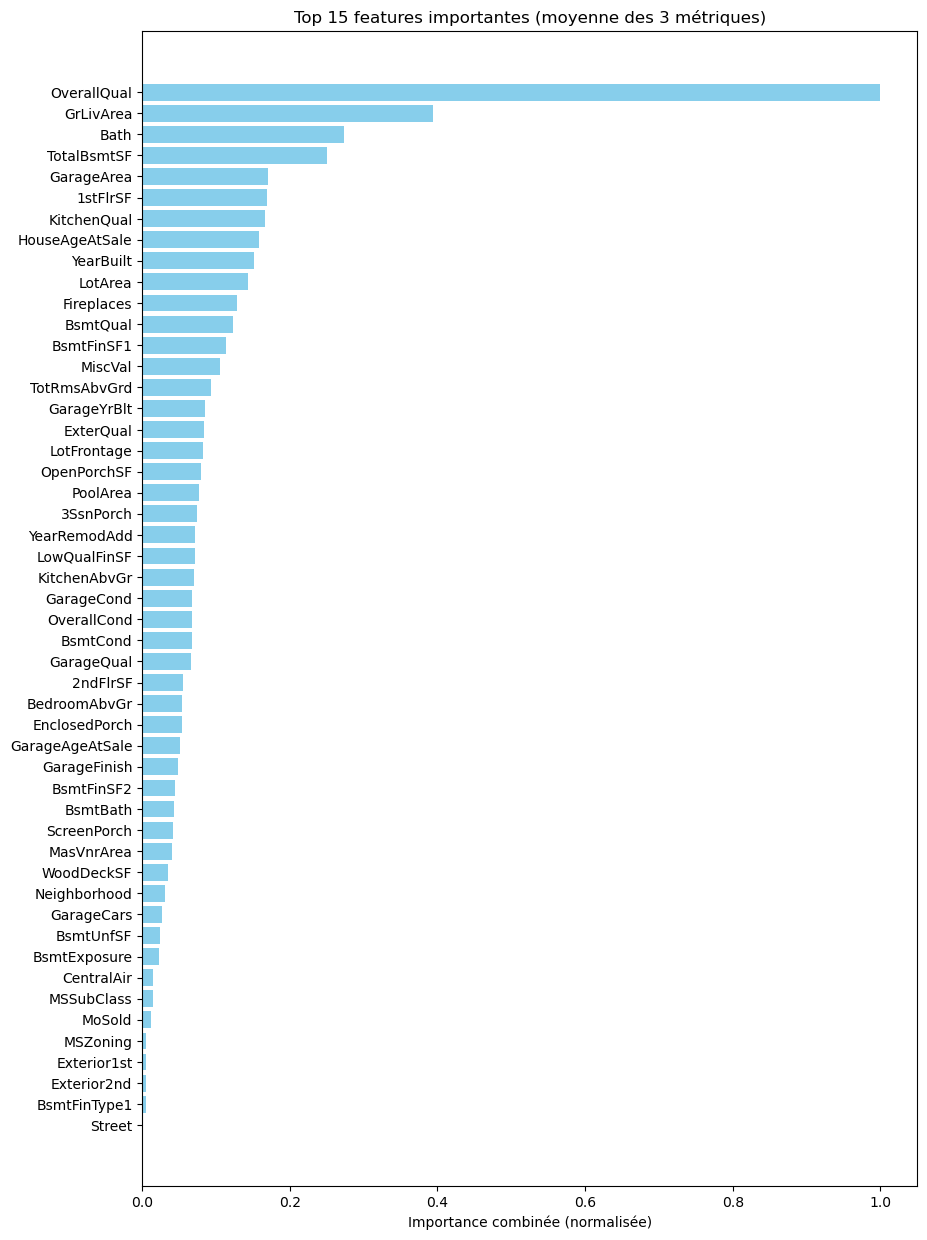

In [69]:
import matplotlib.pyplot as plt

top_features = df_importances.head(15)

plt.figure(figsize=(10,15))
plt.barh(df_importances["Feature"].astype(str), df_importances["Combined"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance combinée (normalisée)")
plt.title("Top 15 features importantes (moyenne des 3 métriques)")
plt.show()


In [70]:
test_file_path = "../data/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_data["HouseAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["YearBuilt"].astype(float)
test_data["GarageAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["GarageYrBlt"].astype(float)
test_data = test_data.drop(columns=["YrSold"], errors="ignore")

test_data["BsmtBath"] = test_data["BsmtFullBath"].astype(float) + 0.5 * test_data["BsmtHalfBath"].astype(float)
test_data["Bath"] = test_data["FullBath"].astype(float) + 0.5 * test_data["HalfBath"].astype(float)
test_data = test_data.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
# test_data = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}
# Remplacer les valeurs
test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
test_data["GarageQual"] = test_data["GarageQual"].replace(quality_mapping)
test_data["GarageCond"] = test_data["GarageCond"].replace(quality_mapping)
# test_data = test_data.drop(columns=["GarageQual"], errors="ignore")

exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
test_data["BsmtQual"] = test_data["BsmtQual"].replace(quality_mapping)
test_data["BsmtCond"] = test_data["BsmtCond"].replace(quality_mapping)
test_data["BsmtExposure"] = test_data["BsmtExposure"].replace(exposure_mapping)

test_data = test_data.drop(
    columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
    errors="ignore")

dataset_df = dataset_df.drop(
    columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
             'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
    errors="ignore")

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

full_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="SalePrice", task=tfdf.keras.Task.REGRESSION)
final_model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
final_model.fit(full_ds)

preds = final_model.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})
output['SalePrice']= output['SalePrice'].apply(lambda x: np.exp(x))


output.head()

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpd4d78g6v as temporary training directory
Reading training dataset...


/tmp/ipykernel_213/232324657.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
/tmp/ipykernel_213/232324657.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_213/232324657.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

Training dataset read in 0:00:00.436266. Found 1460 examples.
Training model...


I0000 00:00:1756914321.072170     213 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756914321.072243     213 kernel.cc:783] Collect training examples
I0000 00:00:1756914321.072263     213 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756914321.072853     213 kernel.cc:401] Number of batches: 2
I0000 00:00:1756914321.072871     213 kernel.cc:402] Number of examples: 1460
I0000 00:00:1756914321.073881     213 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Utilities (1 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756914321.074439     213 kernel.cc:802] Training dataset:
Number of records:

Model trained in 0:00:06.325509
Compiling model...


I0000 00:00:1756914327.368325     213 decision_forest.cc:808] Model loaded with 300 root(s), 138400 node(s), and 49 input feature(s).
2025-09-03 15:45:27.368419: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


2/2 [==============================] - 0s 34ms/step


Id      SalePrice
0  1461  125416.457876
1  1462  151811.679345
2  1463  175575.721649
3  1464  183744.004869
4  1465  191976.771431

In [73]:
sample_submission_df = pd.read_csv('../data/sample_submission.csv')
sample_submission_df['SalePrice'] = final_model.predict(test_ds)
sample_submission_df['SalePrice']= sample_submission_df['SalePrice'].apply(lambda x: np.exp(x))
sample_submission_df.to_csv('../submissions/submission11_retrain_model_on_full_DS.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 31ms/step


Id      SalePrice
0  1461  125416.457876
1  1462  151811.679345
2  1463  175575.721649
3  1464  183744.004869
4  1465  191976.771431

In [72]:
# kaggle competitions submit -c house-prices-advanced-regression-techniques -f work/submissions/submission11_retrain_model_on_full_DS.csv -m "11th try: retrain model on full DS "